# PART 1
## Implement a Python program to reconstruct an image using Principal Component Analysis

In [5]:
#Importing libraries
import cv2
import numpy as np 
import matplotlib.pyplot as plt

(904, 603, 3)


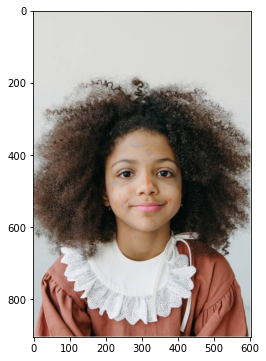

In [6]:
# Loading the image 
img = cv2.imread('C:/Users/Roy/Desktop/pexels-anastasia-shuraeva-6964741.jpg')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_RGB.shape)
plt.rcParams["figure.figsize"] = (12,6)
plt.imshow(img_RGB)

### Converting image to 2D Array

Image has 3 dimensions - length, width and RGB components. But PCA can undertand a format of rows and columns. So I am converting image to 2D by reshaping the image array. Columns will be multiplied by 3. 

In [17]:
# The array has 1048 rows each of pixel 1083x3. We will reshape it into a format that PCA can understand. 
#  1809 = 603 * 3 
img_r = np.reshape(img_RGB, (904,1809)) 
print(img_r.shape)

(904, 1809)


### Standardizing the Dataset

Converting reshaped array into a Numpy array which can be used for computation.

In [18]:
#Converting data into numpy array
img_np = np.array(img_r)
print(img_r.shape)

(904, 1809)


### Creating a Covariance Matrix

In [19]:
covariance_mat = img_r - np.mean(img_r, axis = 0) # Rows taken since it has minimum value. 
covariance_mat

array([[  2.4800885 ,   1.08628319,   0.93362832, ...,   1.07300885,
          0.55530973,   1.16039823],
       [ -8.5199115 ,  -9.91371681, -10.06637168, ...,  -2.92699115,
         -3.44469027,  -2.83960177],
       [  2.4800885 ,   1.08628319,   0.93362832, ...,  -3.92699115,
         -4.44469027,  -3.83960177],
       ...,
       [ -3.5199115 ,   1.08628319,   2.93362832, ...,  -0.92699115,
         -0.44469027,   1.16039823],
       [ -7.5199115 ,  -2.91371681,  -3.06637168, ...,  -4.92699115,
         -4.44469027,   1.16039823],
       [ -1.5199115 ,   1.08628319,   2.93362832, ...,   1.07300885,
         -0.44469027,   1.16039823]])

### Calculating Eigenvalues 

In [20]:
eig_val, eig_vec = np.linalg.eigh(np.cov(covariance_mat))
p = np.size(eig_vec, axis =0)
idx = np.argsort(eig_val)
idx = idx[::-1]
eig_vec = eig_vec[:,idx]
eig_val = eig_val[idx]
eig_val.size

904

In [21]:
numpc = 100 # Number of Principal Components considered is 100
if numpc <p or numpc >0:
    eig_vec = eig_vec[:, range(numpc)]
score = np.dot(eig_vec.T, covariance_mat)
recon = np.dot(eig_vec, score) + np.mean(img_r, axis = 0).T #Normalization

In [22]:
recon_img_mat = np.uint8(np.absolute(recon)) # To control complex eigen values
recon_img_mat.shape

(904, 1809)

### Converting 2D Array into 3D Array to convert to image

In [23]:
recon_img_mat.reshape(904, 603, 3)

array([[[254, 254, 252],
        [221, 221, 219],
        [222, 223, 220],
        ...,
        [217, 217, 215],
        [215, 215, 214],
        [254, 255, 254]],

       [[254, 254, 252],
        [219, 219, 217],
        [220, 220, 218],
        ...,
        [212, 212, 211],
        [212, 212, 210],
        [254, 254, 253]],

       [[254, 254, 252],
        [219, 219, 217],
        [220, 220, 218],
        ...,
        [211, 211, 209],
        [210, 210, 208],
        [254, 254, 253]],

       ...,

       [[245, 254, 252],
        [196, 204, 199],
        [198, 200, 195],
        ...,
        [186, 191, 193],
        [190, 194, 197],
        [250, 251, 253]],

       [[246, 254, 252],
        [203, 210, 205],
        [206, 208, 203],
        ...,
        [191, 196, 197],
        [195, 199, 202],
        [250, 252, 254]],

       [[252, 254, 252],
        [215, 217, 215],
        [215, 216, 214],
        ...,
        [210, 212, 211],
        [209, 210, 209],
        [254, 254, 253]]

### Reconstructing image

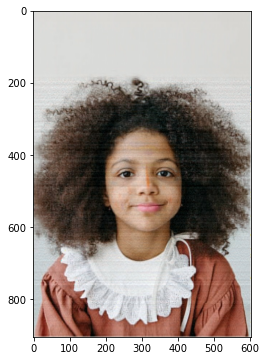

In [24]:
cv2.imwrite('colour_img.jpg', recon_img_mat.reshape(904, 603, 3))
plt.rcParams["figure.figsize"] = (12,6)
plt.imshow(cv2.imread('colour_img.jpg'))

# PART 2
## Calculate RMSE and show that as number of Principal Components increases error decreases

In [27]:
# Finding out rmse and plotting against no. of components to show error decreses
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
RMSEs=[]
components = [i for i in range(1,905,20)] # I have skipped 50 components at a time to reduce computational time   
for n in components:
    pca = PCA(n_components=n)
    recon = pca.inverse_transform(pca.fit_transform(img_np))
    rmse = mean_squared_error(img_np[0], recon[0],squared=False)
    RMSEs.append(rmse)
    print("RMSE: {} with {} components".format(rmse, n))

RMSE: 20.116353204445964 with 1 components
RMSE: 6.3626964247588855 with 21 components
RMSE: 4.97419079344445 with 41 components
RMSE: 4.259249803702801 with 61 components
RMSE: 3.759961244542587 with 81 components
RMSE: 3.5412211433509193 with 101 components
RMSE: 3.2699067950688767 with 121 components
RMSE: 3.038939930655836 with 141 components
RMSE: 2.939518367211473 with 161 components
RMSE: 2.77568316878867 with 181 components
RMSE: 2.559534255667976 with 201 components
RMSE: 2.3934783907041597 with 221 components
RMSE: 2.2831274703908053 with 241 components
RMSE: 2.0132977814123008 with 261 components
RMSE: 1.807337157664473 with 281 components
RMSE: 1.7044649624718897 with 301 components
RMSE: 1.4925135035286723 with 321 components
RMSE: 1.404277186950252 with 341 components
RMSE: 1.175697662584568 with 361 components
RMSE: 1.045438090969942 with 381 components
RMSE: 0.9235974720253948 with 401 components
RMSE: 0.8558565872526591 with 421 components
RMSE: 0.7674759510601062 with

### Plotting RMSE against Number of Components

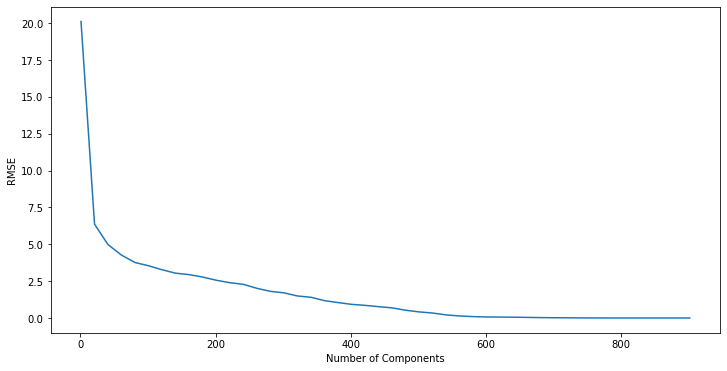

In [28]:
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(components,RMSEs)
plt.ylabel('RMSE')
plt.xlabel('Number of Components')
plt.show()

We can observes that as the Number of Principal Components increases the error decreases. It decreases rapidly when the components are increased from 1 to around 100, after this it decreases slowly and gradually.

# PART 3
## Also show that how many minimum number of Principal Components are sufficient to reconstruct the image

To demonstate this, I have plotted a graph of Variance % against No. of PCs. We can observe that we do not need all 904 PCs.

In [29]:
# Calculating Variance percentage 
covar_matrix = PCA(n_components = 904)
covar_matrix.fit(img_np)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
#var.size

array([64.8, 82.4, 85.3, 87.6, 89.6, 90.9, 92.1, 92.8, 93.5, 94. , 94.5,
       94.9, 95.3, 95.6, 95.8, 96. , 96.2, 96.4, 96.6, 96.8, 96.9, 97. ,
       97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1,
       98.2, 98.3, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4,
       98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98.4, 98

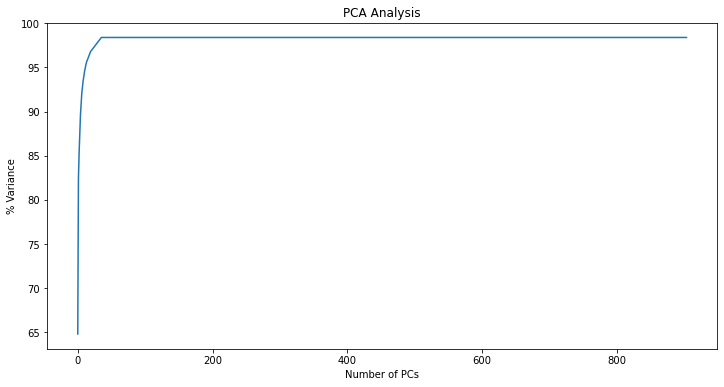

In [30]:
# Plotting Variance vs No of PCs
plt.rcParams["figure.figsize"] = (12,6)
plt.ylabel('% Variance')
plt.xlabel('Number of PCs')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

From the above graph, we get to know we need less than 100 PCs for certain. On plotting a more zoomed in graph we can observe the following.

Text(3, 95, '98% cut-off threshold')

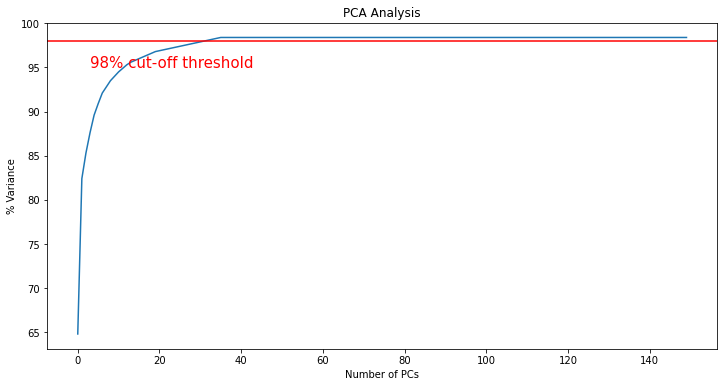

In [31]:
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(var[0:150])
plt.ylabel('% Variance')
plt.xlabel('Number of PCs')
plt.title('PCA Analysis')
plt.axhline(y=98, color='r', linestyle='-')
plt.text(3,95, '98% cut-off threshold', color = 'red', fontsize=15)

Around 35 PCs are sufficied for 98% image accuracy.

### Reconstructing images with different values of PCs

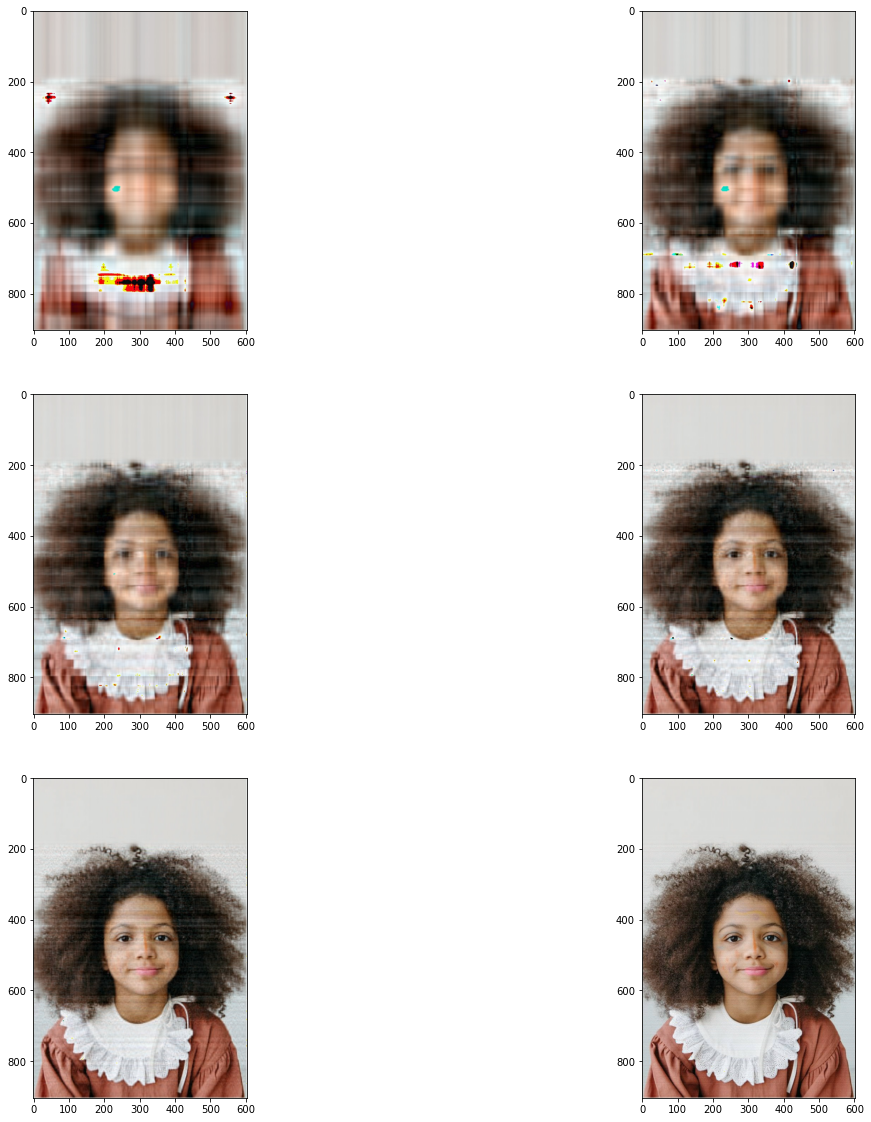

In [35]:
PCs = [5, 10, 20, 35, 70, 200] # PCs
index=1
for numpc in PCs:
    cov_mat = img_np - np.mean(img_np , axis = 0)
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) 
    p = np.size(eig_vec, axis =0)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    if numpc <p or numpc >0:
        eig_vec = eig_vec[:, range(numpc)]
    score = np.dot(eig_vec.T, covariance_mat)
    recon = np.dot(eig_vec, score) + np.mean(img_r, axis = 0).T 
    recon_img_mat = np.uint8(np.absolute(recon)) 
    cv2.imwrite('colour_img.jpg', recon_img_mat.reshape(904, 603, 3))
    plt.subplot(3, 2, index) 
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(cv2.imread('colour_img.jpg'))
    index+=1
plt.show()

- For number of PCs 5, 10 and 20, images reconstructed are too blurred. 
- For number of PCs 35 and 70, images are good enough, the girl's picture is reconstucted well to recognize her in the photograph. But still some loss is there in the picture - the mid portion, her hair is not reconstuced well.
- For number of PCs = 200, the image is reconstructed the best, the loss is negligible.